# Research Question No. 3
What is the comparative performance of learning algorithms in long-lived bug prediction in FLOSS project? This research question aims to compare the accuracy of the long-lived bug prediction made by different classification algorithms. Here the algorithm with the best prediction capabilities is best fit in terms of balanced accuracy.

# Experiment 1

## Experimental parameters


| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 | KNN, NB, NN, SVM, RF |
| Metrics                    | Accuracy, Kappa, ROC |
| Features                   | Short and Long Description |
| Number of Terms            |        100       |
| Balancing                  |        Unbalance, Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 1. Setup environment.

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd
import seaborn as sns 
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal

# Setup Matplotlib
plt.rc('figure', figsize=(20, 20))
plt.style.use('default')
%matplotlib inline 

# Setup Seaborn
sns.set_context("paper")
sns.set_style("ticks")

pd.set_option('display.max_columns', None)

metrics_e1_path  = "datasets/rq3e1/20190918180550_rq3e1_eclipse_predict_long_lived_metrics.csv"
test_e1_path     = "datasets/rq3e1/20190918180550_rq3e1_eclipse_nn_smote_long_description_100_bacc_test_results.csv"
bug_reports_path = "datasets/20190917_eclipse_bug_report_data.csv"
print("Setup complete")

Setup complete


## 2. Load data.

In [6]:
    !echo "\nHeader of metrics file $metrics_e1_path"
    !head -n 2 $metrics_e1_path

    !echo "\nNumber of lines in the file $metrics_e1_path"
    !wc -l $metrics_e1_path



Header of metrics file datasets/rq3e1/20190918180550_rq3e1_eclipse_predict_long_lived_metrics.csv
project,feature,n_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,test_size,test_size_class_0,test_size_class_1,tp,fn,fp,tn,sensitivity,specificity,balanced_acc,balanced_acc_manual,precision,recall,fmeasure
eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,365,12847,6665,6182,2408,2221,187,71,116,656,1565,0.379679144385027,0.704637550652859,0.542158347518943,0.542158347518943,0.097661623108666,0.379679144385027,0.155361050328228

Number of lines in the file datasets/rq3e1/20190918180550_rq3e1_eclipse_predict_long_lived_metrics.csv
61 datasets/rq3e1/20190918180550_rq3e1_eclipse_predict_long_lived_metrics.csv


In [7]:
# read metrics data.
metrics_e1_data = pd.read_csv(metrics_e1_path)
rows_and_cols = metrics_e1_data.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {metrics_e1_path}.\n")

There are 60 rows and 25 columns in datasets/rq3e1/20190918180550_rq3e1_eclipse_predict_long_lived_metrics.csv.



## 3. Review the data

In [8]:
metrics_e1_data.sort_values('balanced_acc', ascending=False).head()

,project,feature,n_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,test_size,test_size_class_0,test_size_class_1,tp,fn,fp,tn,sensitivity,specificity,balanced_acc,balanced_acc_manual,precision,recall,fmeasure
0,eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,365,12847,6665,6182,2408,2221,187,71,116,656,1565,0.379679,0.704638,0.542158,0.542158,0.097662,0.379679,0.155361
1,eclipse,long_description,100,nn,smote,repeatedcv,Kappa,365,12847,6665,6182,2408,2221,187,71,116,656,1565,0.379679,0.704638,0.542158,0.542158,0.097662,0.379679,0.155361
2,eclipse,short_description,100,nb,unbalanced,repeatedcv,Kappa,365,6335,5846,489,2110,1948,162,102,60,1068,880,0.629630,0.451745,0.540688,0.540688,0.087179,0.629630,0.153153
3,eclipse,short_description,100,nb,unbalanced,repeatedcv,ROC,365,6335,5846,489,2110,1948,162,102,60,1068,880,0.629630,0.451745,0.540688,0.540688,0.087179,0.629630,0.153153
4,eclipse,long_description,100,rf,smote,repeatedcv,Accuracy,365,12847,6665,6182,2408,2221,187,20,167,102,2119,0.106952,0.954075,0.530513,0.530513,0.163934,0.106952,0.129450


In [9]:
metrics_e1_data.sort_values('sensitivity', ascending=False).head()

,project,feature,n_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,test_size,test_size_class_0,test_size_class_1,tp,fn,fp,tn,sensitivity,specificity,balanced_acc,balanced_acc_manual,precision,recall,fmeasure
51,eclipse,short_description,100,nb,smote,repeatedcv,ROC,365,11225,5846,5379,2110,1948,162,159,3,1916,32,0.981481,0.016427,0.498954,0.498954,0.076627,0.981481,0.142155
7,eclipse,long_description,100,nb,unbalanced,repeatedcv,Kappa,365,7227,6665,562,2408,2221,187,120,67,1313,908,0.641711,0.408825,0.525268,0.525268,0.083740,0.641711,0.148148
8,eclipse,long_description,100,nb,unbalanced,repeatedcv,ROC,365,7227,6665,562,2408,2221,187,120,67,1313,908,0.641711,0.408825,0.525268,0.525268,0.083740,0.641711,0.148148
2,eclipse,short_description,100,nb,unbalanced,repeatedcv,Kappa,365,6335,5846,489,2110,1948,162,102,60,1068,880,0.629630,0.451745,0.540688,0.540688,0.087179,0.629630,0.153153
3,eclipse,short_description,100,nb,unbalanced,repeatedcv,ROC,365,6335,5846,489,2110,1948,162,102,60,1068,880,0.629630,0.451745,0.540688,0.540688,0.087179,0.629630,0.153153


#### Legenda:
* **Sensitivity:** corresponde à taxa de acerto na classe positiva. Também chamada de taxa de verdadeiros positivos: TP / ( TP + FN ).
* **Specificity:** corresponde à taxa de acerto na classe negativa: TN / ( TN + FP ).
* **Balanced Accuracy:** (Sensibilidade + Especificidade)/2.


## 4. Evaluation Metrics ##

### 4.2 Sensitivity ###
Corresponde à taxa de acerto na classe positiva. Também é chamada de taxa de verdadeiros positivos: TP/(TP+FN). 

<Figure size 432x288 with 0 Axes>

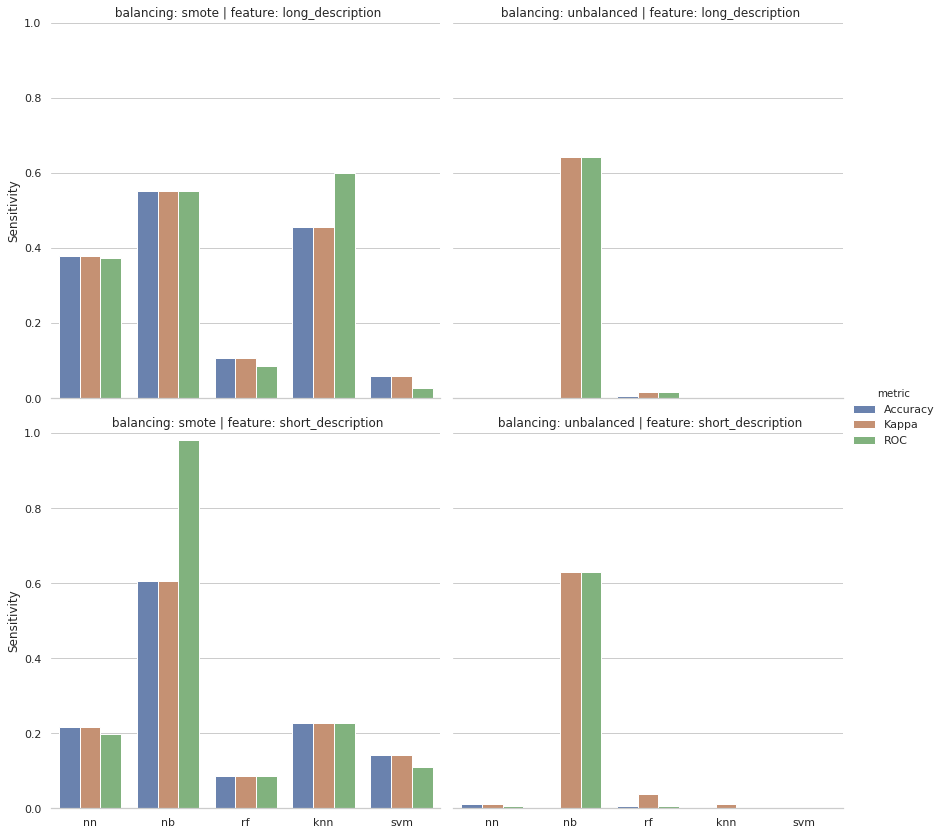

In [10]:
sns.despine(offset=5)
sns.set(style="whitegrid")
#g = sns.FacetGrid(metrics_e1_data, col="balancing", despine=True)
g = sns.catplot(data=metrics_e1_data
                , kind="bar"
                , x="classifier"
                , y="sensitivity"
                , hue="metric"
                , col="balancing"
                , row="feature"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Sensitivity")
  .set_titles(" {col_var}: {col_name} | {row_var}: {row_name}")
  .set(ylim=(0, 1))
  .despine(left=True))

### 4.3 Specificity ###
Corresponde à taxa de acerto na classe negativa: TN/(TN+FP). 

<Figure size 432x288 with 0 Axes>

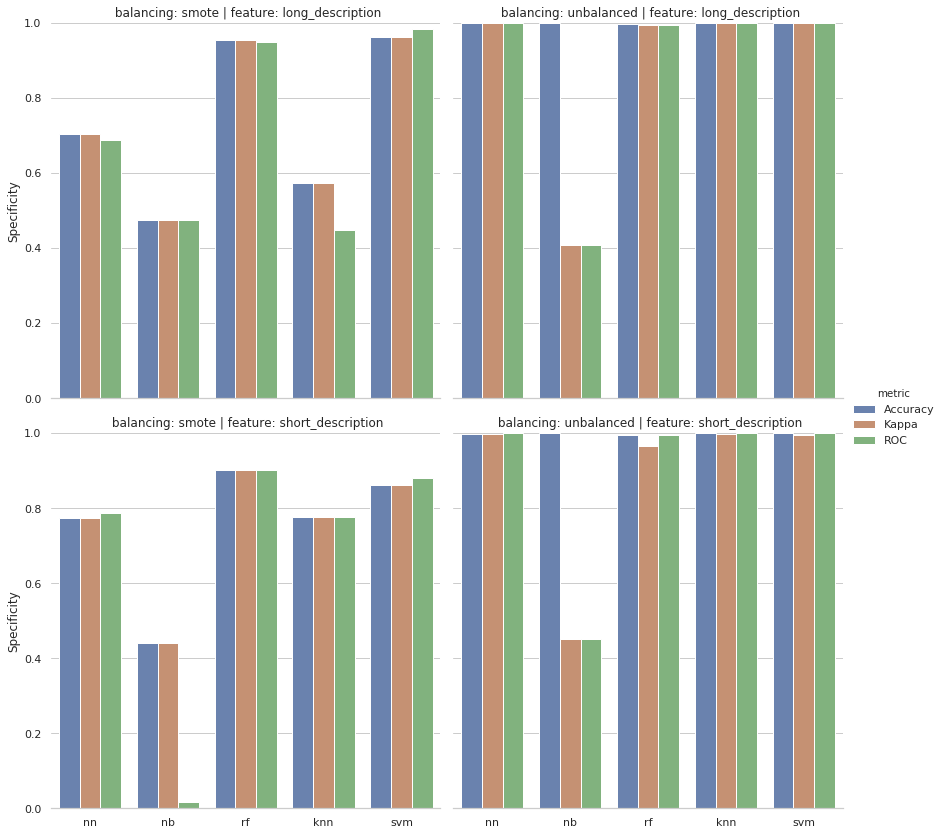

In [11]:
sns.despine(offset=5)
sns.set(style="whitegrid")
#g = sns.FacetGrid(metrics_e1_data, col="balancing", despine=True)
g = sns.catplot(data=metrics_e1_data
                , kind="bar"
                , x="classifier"
                , y="specificity"
                , hue="metric"
                , col="balancing"
                , row="feature"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Specificity")
  .set_titles(" {col_var}: {col_name} | {row_var}: {row_name}")
  .set(ylim=(0, 1))
  .despine(left=True))

### 4.1 Balanced Accuracy
Accurácia balanceada: (sensitivity + specificity)/2

<Figure size 432x288 with 0 Axes>

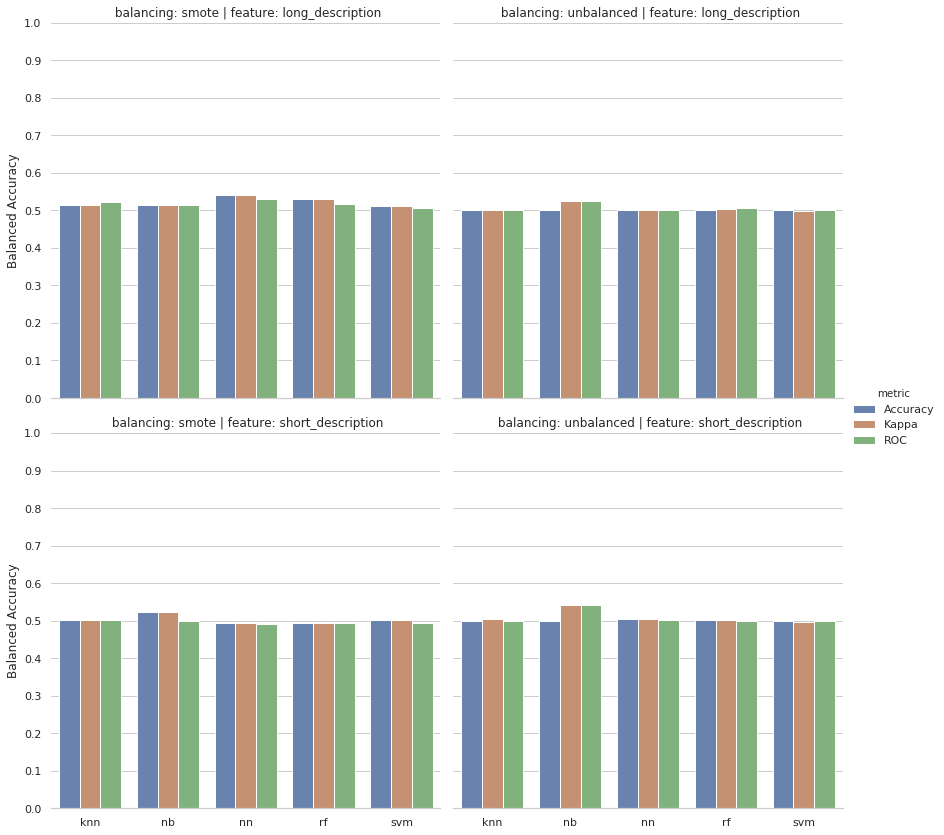

In [14]:
sns.despine(offset=5)
sns.set(style="whitegrid")
g = sns.catplot(data=metrics_e1_data
                , kind="bar"
                , x="classifier"
                , y="balanced_acc"
                , hue="metric"
                , col="balancing"
                , row="feature"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Balanced Accuracy")
  .set_titles(" {col_var}: {col_name} | {row_var}: {row_name}")
  .set(yticks=np.arange(0, 1.1, 0.1))
  .set(ylim=(0, 1))
  .despine(left=True))

## 4.4 Statistical Test

In [12]:
# read data per classifier
knn = metrics_e1_data[metrics_e1_data['classifier'] == 'knn'].balanced_acc
nb  = metrics_e1_data[metrics_e1_data['classifier'] == 'nb'].balanced_acc
nn  = metrics_e1_data[metrics_e1_data['classifier'] == 'nn'].balanced_acc
rf  = metrics_e1_data[metrics_e1_data['classifier'] == 'rf'].balanced_acc
svm = metrics_e1_data[metrics_e1_data['classifier'] == 'svm'].balanced_acc

# compare samples with Friedman Test
stat, p = friedmanchisquare(knn, nb, nn, rf, svm)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=21.148, p=0.000
Different distributions (reject H0)


In [33]:
# read data per classifier
knn = metrics_e1_data[metrics_e1_data['classifier'] == 'knn'].sensitivity
nb  = metrics_e1_data[metrics_e1_data['classifier'] == 'nb'].sensitivity
nn  = metrics_e1_data[metrics_e1_data['classifier'] == 'nn'].sensitivity
rf  = metrics_e1_data[metrics_e1_data['classifier'] == 'rf'].sensitivity
svm = metrics_e1_data[metrics_e1_data['classifier'] == 'svm'].sensitivity

# compare samples with Friedman Test
stat, p = friedmanchisquare(knn, nb, nn, rf, svm)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=21.247, p=0.000
Different distributions (reject H0)


## 5. Test results analisys

### 5.1 Long-lived bug correct prediction (nn, smote, accuracy, 100 terms)

In [13]:
test_e1_data = pd.read_csv(test_e1_path)

In [14]:
bug_reports_data = pd.read_csv(bug_reports_path)
test_e1_merged_data = pd.merge(
    bug_reports_data,
    test_e1_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)

In [16]:
correct_predicted_bugs = test_e1_merged_data.query('long_lived == "Y" and y_hat == "Y"').head()